# ML Intro Lab
## Data for today experiment can be found at:
### https://paperswithcode.com/dataset/forest-covertype


## In this lab we will use a series of tools imported from standard python libraries.

* numpy: Mathematics on arrays of data
* pandas: Data set manipulation
* time: Measuring computational performance
* matplotlib: Basic data visualization
* seaborn: Data visualization
* torch: Parallel processing and GPU utilization 

In [10]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import torch

## First we will need to import the availble data for inspection
### Things to think about:
- What kinds of data do we have access to?
    - Continuous, Discrete, Binary, Categorical?
- Are there outliers in the data?
- Is the data complete, or do certain fields contain NANs?
- How is the data distributed?

In [11]:

#%%  Data Investigation
df=pd.read_csv('../Data/covtype.csv')
df=df[:100000]
print(f"Data set contain {len(df)} rows, with {len(df.keys())} columns.\n")
print(f"An easy way to access base stats of the data frame is the .describe() method \n{df.describe()}")

Data set contain 100000 rows, with 55 columns.

An easy way to access base stats of the data frame is the .describe() method 
           Elevation         Aspect          Slope  \
count  100000.000000  100000.000000  100000.000000   
mean     2862.036680     138.162920      11.802790   
std       231.376584     103.779201       6.498328   
min      1863.000000       0.000000       0.000000   
25%      2724.000000      55.000000       7.000000   
50%      2903.000000     110.000000      11.000000   
75%      3004.000000     204.000000      15.000000   
max      3849.000000     360.000000      61.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      100000.00000                   100000.000000   
mean                          260.57953                       35.242090   
std                           202.77772                       42.622758   
min                             0.00000                     -146.000000   
25%         

## Let's take a closer look at our continuous data  
### What kind of task can we preform on this type of data?
- Catagories are provided. Supervised vs. Unsupervised?
- Though the following visualization can you tell which data types are continuous, binary, and class labels?
- Are classes evenly distributed?
    - How may this affect our modeling and performance evaluation?

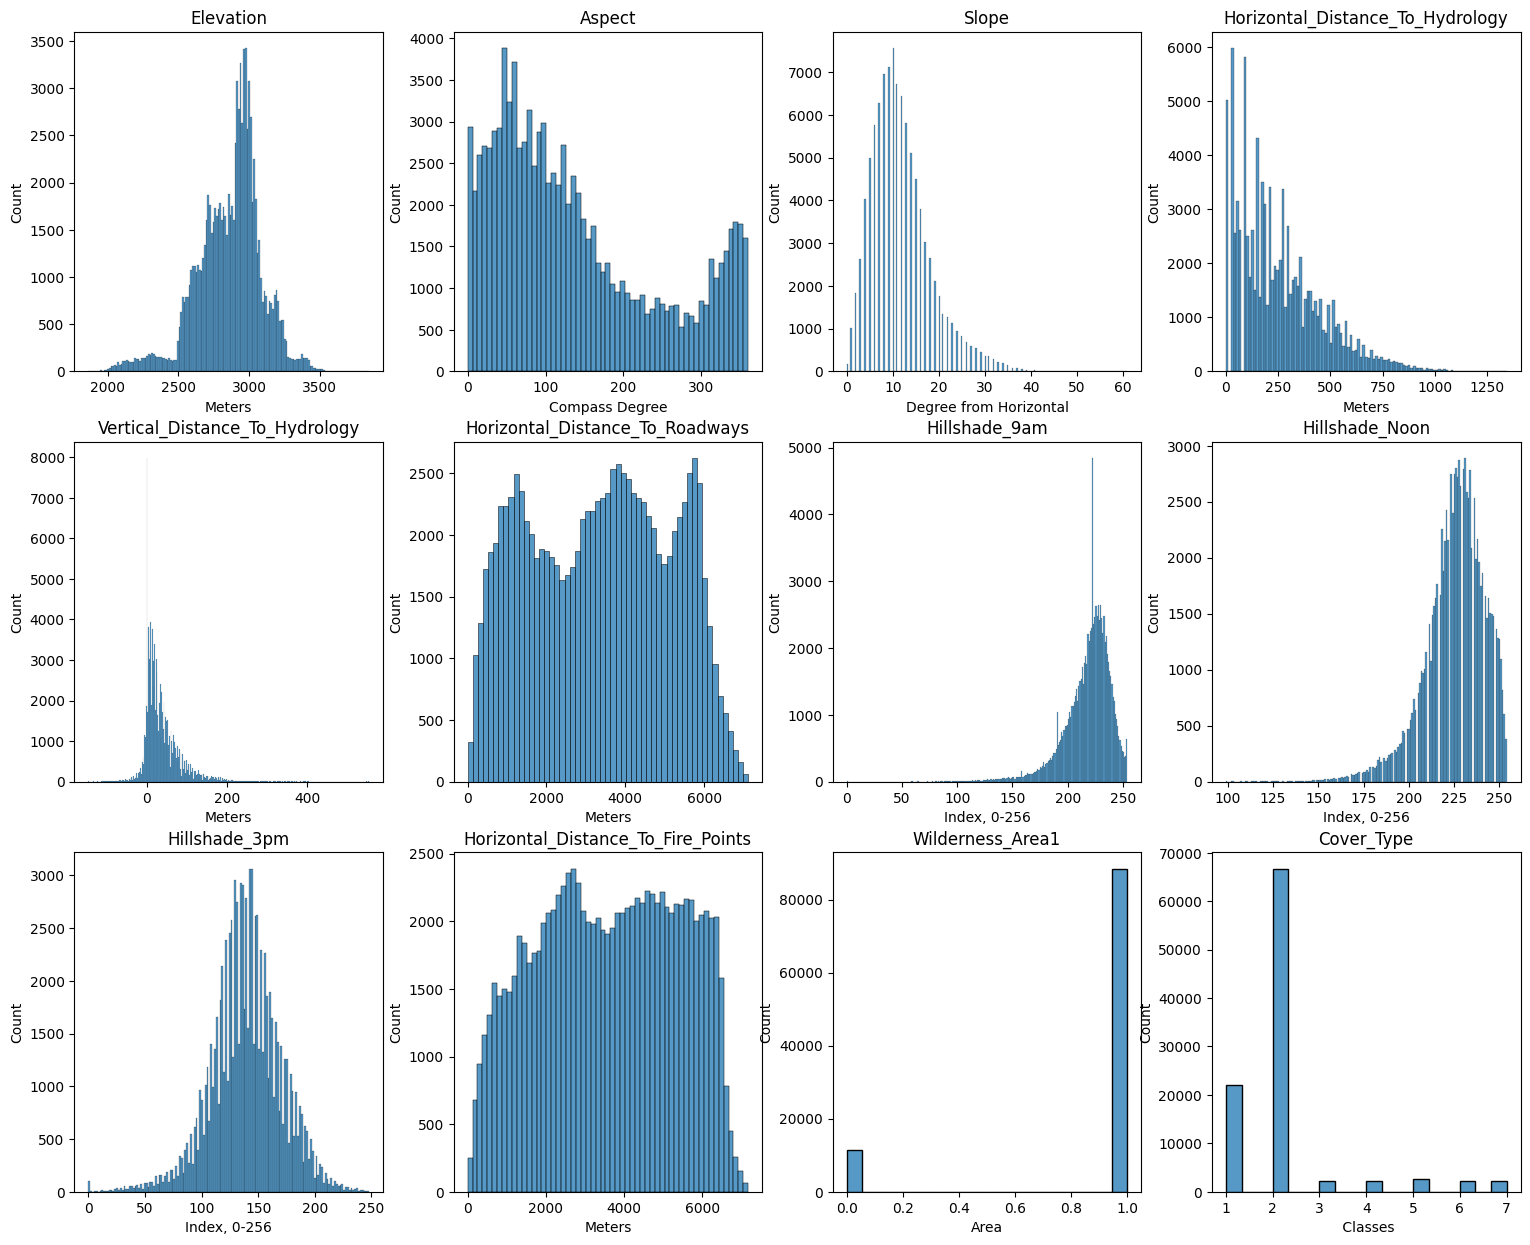

In [4]:
# %% Data visualization: distribution of our numeric data
metrics=['Meters', 'Compass Degree', 'Degree from Horizontal', 'Meters', 'Meters' , 'Meters', 
         'Index, 0-256', 'Index, 0-256', 'Index, 0-256','Meters', 'Area', ' Classes']

def hist_plotter(df, metrics):
    fig, axs = plt.subplots(3,4, figsize=(15, 12), facecolor='w', edgecolor='k')
    fig.tight_layout(pad=0.4, w_pad=2, h_pad=3.0)
    axs = axs.ravel()
    for i in range(11):
        sns.histplot(df[df.keys()[i]], ax=axs[i])
        axs[i].set_title(df.keys()[i])
        axs[i].set_xlabel(metrics[i])

    sns.histplot(df['Cover_Type'], ax=axs[i+1])
    axs[i+1].set_title('Cover_Type')
    axs[i+1].set_xlabel(metrics[i+1])   #----> What type of task can we preform with this type of data?

hist_plotter(df, metrics)

## How are features of the data related?
### Can the data points for the different classes be separated simply by using existing features?

## Hands on portion: We wish to choose variables that separate the different species of vegetation.
- Use pairplot_features to see if the data can be separated.

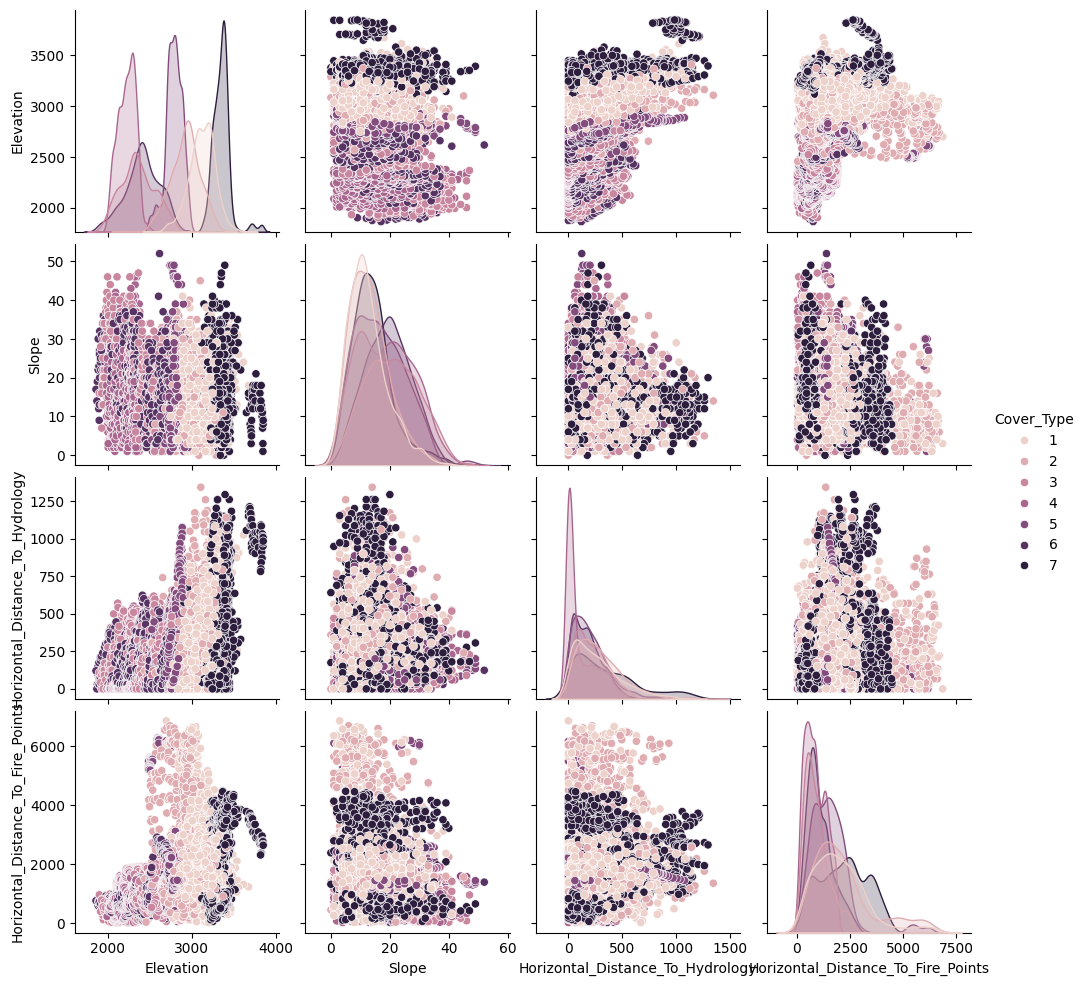

In [12]:
# df.keys()==['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
#        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
#        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
#        'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
#        'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
#        'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
#        'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
#        'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
#        'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
#        'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
#        'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
#        'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
#        'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
#        'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
#        'Soil_Type39', 'Soil_Type40', 'Cover_Type']

pairplot_features=['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type']

sns.pairplot(df[pairplot_features].head(10000), hue='Cover_Type')



## Can we do better using a classic classifier model?  
### All distance based classifiers require scaling to ensure all features have similar importance in the classification of data. 
Several scaling methods are implemented through sklearn. The choice of scaler depends on the data distribution and model selection.

## Hands on: experiment with the different scalers, listed above, to see how the data is transformed for your previous feature selection.

Documentation on sklearn scalers can be found at: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

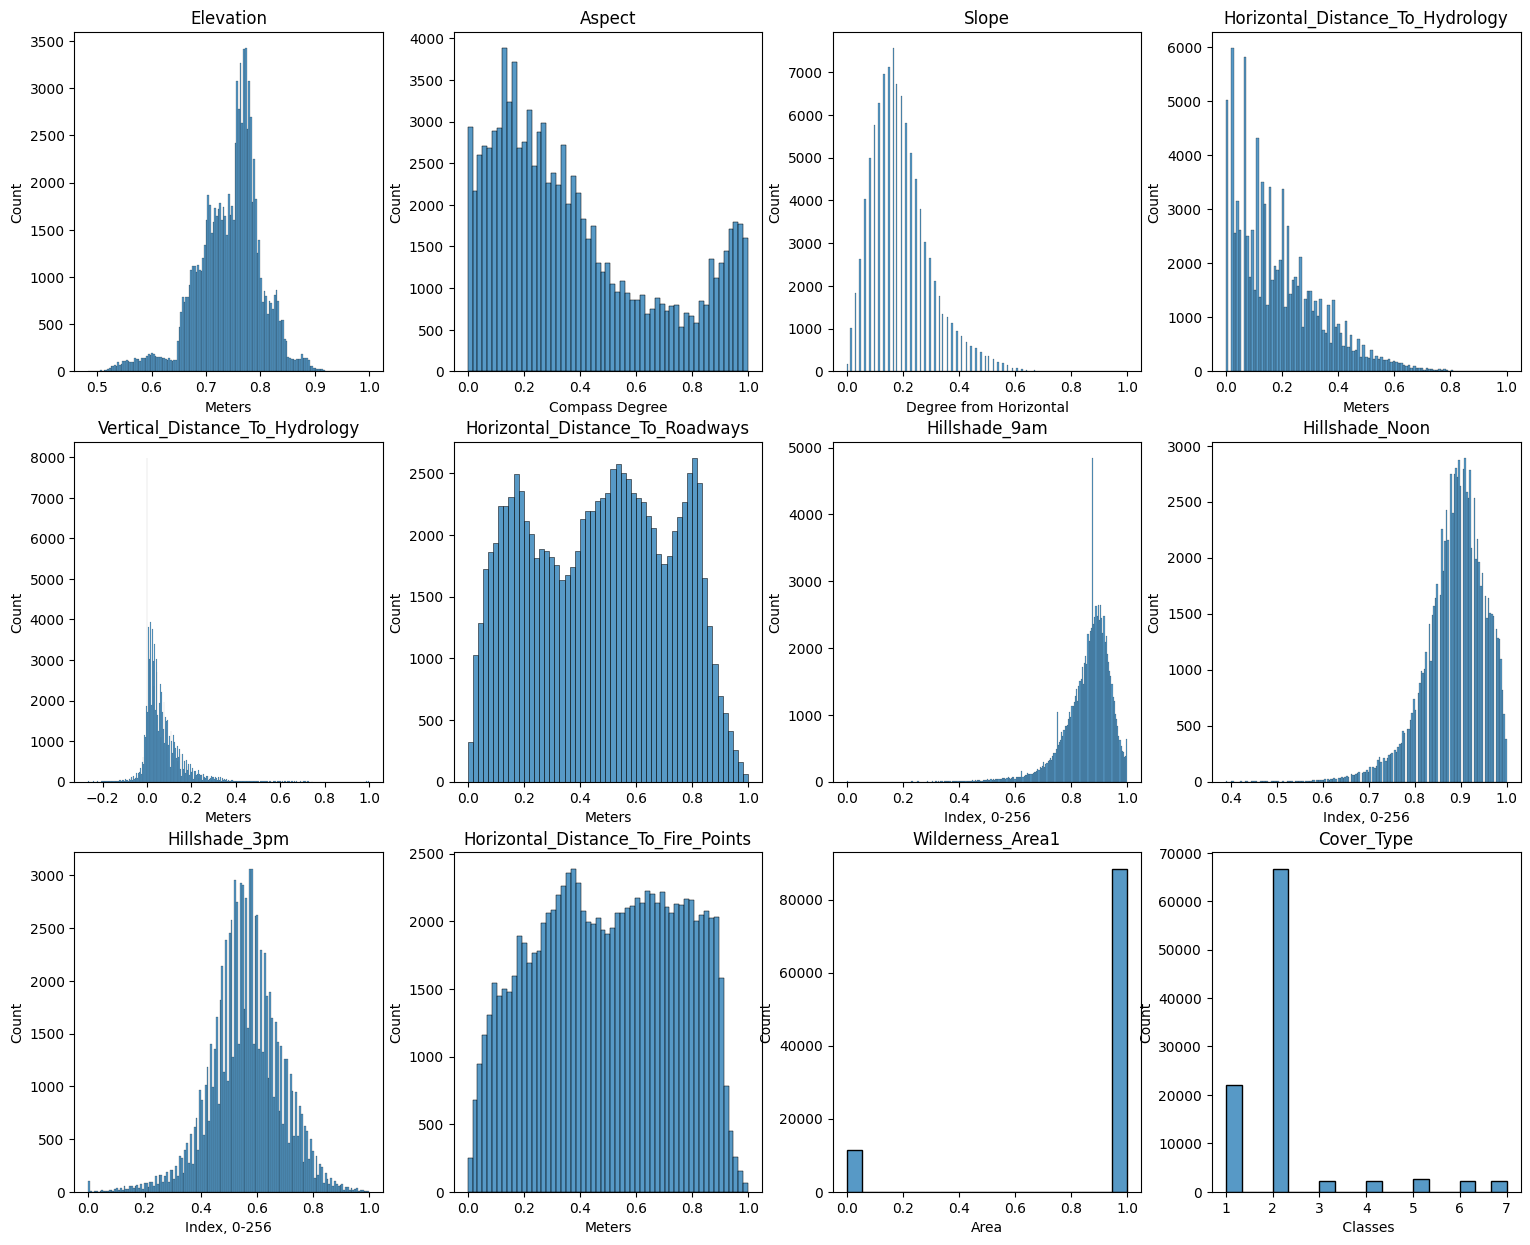

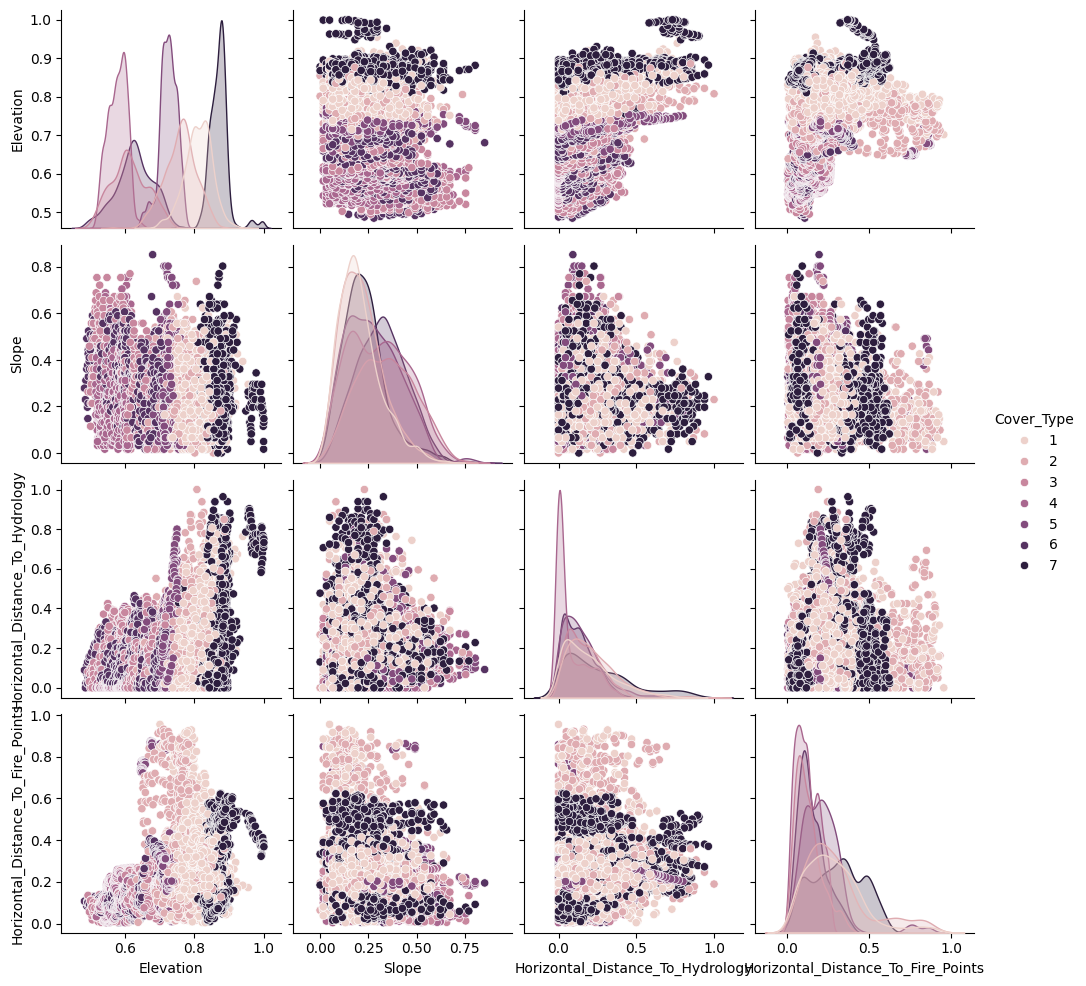

In [14]:
from sklearn.preprocessing import StandardScaler , MaxAbsScaler, MinMaxScaler, RobustScaler, PowerTransformer, Normalizer

s=MaxAbsScaler()  #---->  Hands on portion

scaled_data=s.fit_transform(df.drop('Cover_Type', axis=1)) #scaler returns a np.array
scaled_df=pd.DataFrame(scaled_data, columns=df.keys()[:-1])
scaled_df['Cover_Type']=df['Cover_Type']
hist_plotter(scaled_df, metrics)

sns.pairplot(scaled_df[pairplot_features].head(10000), hue='Cover_Type')

## Data separation (Supervised Modeling)
### We wish to build a classifier model. This model should be able to predict the Cover_Type of a previously unseen data point.

We need to separate our labeled data in to a training and testing set, for the model to learn.
- Separate dependant and independent variables
- Select a portion of the data to use as a test set for model validation

In [15]:
from sklearn.model_selection import train_test_split 

#first we will separate our dependant and independent variables. 
X=scaled_df[scaled_df.keys()[:-1]]
y=scaled_df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"The length of the train (X,y):({len(X_train)}, {len(y_train)})")
print(f"The length of the test  (X,y):({len(X_test)}, {len(y_test)})")
print(f"The ratio of test/total: {len(X_test)/len(scaled_df)}")

The length of the train (X,y):(67000, 67000)
The length of the test  (X,y):(33000, 33000)
The ratio of test/total: 0.33


# Modeling 
## Serval classic classier models exist. They very based on the methods used to sort data into different classes.    
Each has unique hyperparameters that may be used to adjust the model. 
- By adjusting the model we determine how well the model fits the training and testing data. 
- Fit determines how well the model will generalize to new data, for use on unseen/unknown/unlabeled data.

# Begin Modeling
We will compare three classic machine learning models commonly implemented in the field.
## Hands on: Change hyper parameter value to better fit the model
- K Nearest Neighbors (KNN)
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- Decision Tree Classifier 
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Multi Layer Perceptron (MLP)
    - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [7]:
####################### K Nearest Neighbors (pooled voting) ##########################
#                                                        Documentation for HyperParameters 
from sklearn.neighbors import KNeighborsClassifier  # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
time1=time.time()
# training
k_model=KNeighborsClassifier(n_neighbors=15, n_jobs=-1) #----> Hands on: Change hyper parameter value to better fit the model
k_model.fit(X_train, y_train)

# scoring
kte_accuracy=k_model.score(X_test, y_test)
ktr_accuracy=k_model.score(X_train, y_train)
time2=time.time()
print(f"Kneighbors train score:{ktr_accuracy}, testing score: {kte_accuracy}, runtime:{np.round(time2-time1, 2)}")

Kneighbors train score:0.9062388059701493, testing score: 0.8907575757575757, runtime:4.32


In [29]:
# %% ####################### Decision Tree Classifier (Non-parametric supervised learning method used for classification) ##########################
#                                                        Documentation for HyperParameters 
from sklearn.tree import DecisionTreeClassifier # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
time1=time.time()
# training
t_model=DecisionTreeClassifier(max_depth=14, min_samples_split=7, min_samples_leaf=3)  #----> Hands on: Change hyper parameter value to better fit the model
t_model.fit(X_train, y_train)

# scoring
tte_accuracy=t_model.score(X_test, y_test)
ttr_accuracy=t_model.score(X_train, y_train)
time2=time.time()
print(f"RandomForrest train score:{ttr_accuracy}, testing score: {tte_accuracy}, runtime:{np.round(time2-time1, 2)}")

RandomForrest train score:0.9334179104477612, testing score: 0.9026666666666666, runtime:0.41


In [28]:
# %% ####################### Multi Layer Perceptron (Artificial Neural Network) ##########################
#                                                       Documentation for HyperParameters 
from sklearn.neural_network import MLPClassifier    # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
time1=time.time()
# training
n_model=MLPClassifier(alpha=.0001, learning_rate='adaptive', activation='relu', max_iter=500)  #----> Hands on: Change hyper parameter value to better fit the model
n_model.fit(X_train, y_train)

# scoring
nte_accuracy=n_model.score(X_test, y_test)
ntr_accuracy=n_model.score(X_train, y_train)
time2=time.time()
print(f"Neural Net train score:{ntr_accuracy}, testing score: {nte_accuracy}, runtime:{np.round(time2-time1, 2)}")



Neural Net train score:0.8949402985074627, testing score: 0.8804242424242424, runtime:97.13
